<a href="https://colab.research.google.com/github/mudu89/ML_AssignmentPS01/blob/main/2024DA04200_Problem_Statement_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ML_Assignment_01/ML_AssignmentPS01

/content/drive/MyDrive/ML_Assignment_01/ML_AssignmentPS01


### **1. Importing the dataset:**

Read the dataset from the path into a pandas dataframe.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
dataset_file = './risk_factors_cervical_cancer.csv'

df = pd.read_csv(dataset_file)

### **2. Data Exploration and Analysis:**

In this section, we will perform exploratory analysis of the dataset to get insight of the data, and understand the correlation of the variables.

We will also identify if the correlation analysis helps in the feature selection process.

In [4]:
pd.set_option('display.max_columns', None)
print("The shape of the given dataset is:", df.shape)
print("Sanity Check:")
df.head(2)

The shape of the given dataset is: (858, 36)
Sanity Check:


,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

We have a total of 35 attributes and 1 target variable in the dataset. There are mix of numeric and categorical data.

10 attributes are numeric and 26 are categorical.

We can group the columns into :
  
  a) Demographic data: Age, Number of sexual partners, First Sexual intercourse, number of pregnancies.

  b) Behavorial data: Smokes, Contraceptive usage.

  c) Medical history data: STDs, Cancer, CIN, HPV.
  
  d) Diagnosis data: Hinselmann, Schiller, Citology, Biopsy

**2.1. Univariate Analysis (Categorical Attributes):**

In this section, we will perform analysis of the categorical attributes to get more insights on their data.

In [6]:
df.describe(exclude=['int64'])

,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Time since first diagnosis,STDs: Time since last diagnosis
count,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858,858
unique,13,22,12,3,31,63,3,41,3,27,3,6,3,2,3,3,3,3,3,3,2,3,3,3,19,19
top,2.0,15.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,?,?
freq,272,163,270,722,722,722,481,269,658,658,674,674,709,753,749,710,735,752,752,752,753,735,752,751,787,787


From the above table, we can identify that majority of the attributes are having 3 or less unique values.

Also the frequency of the top value for such attributes is more than 70% of the total count.



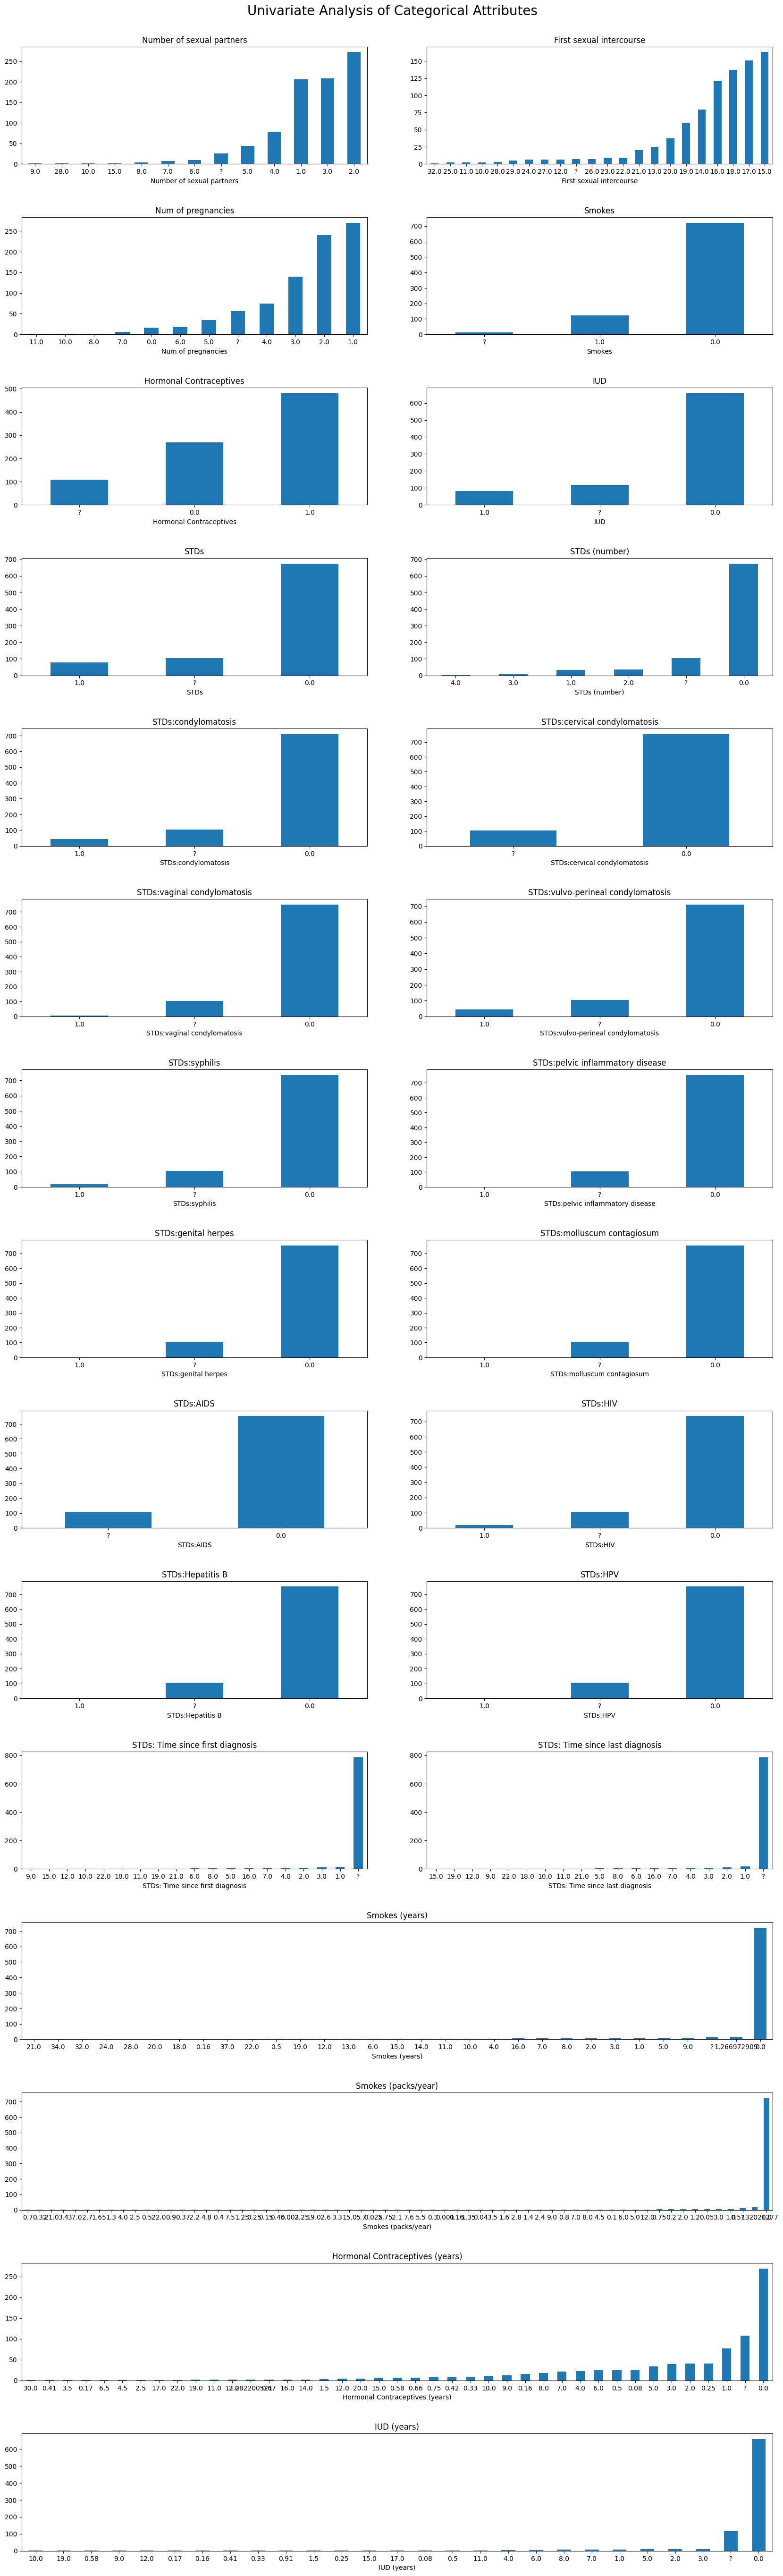

In [7]:

fig, a = plt.subplots(15, 2, figsize=(18, 55))
fig.tight_layout(pad=6.0)
fig.align_titles()
fig.suptitle('Univariate Analysis of Categorical Attributes',y=1.0,va='top',fontsize=20)

axes = a.flatten()
gs = axes[0].get_gridspec()


sbplt_barh = 0
full_width_row = 11
for col in df.select_dtypes(include='object').columns:
  # Select the current axis
  if df[col].nunique() <= 25:
    kind = 'bar'
    ax = axes[sbplt_barh]
    sbplt_barh += 1
  else:
    kind = 'bar'
    axes[full_width_row * 2].remove()
    axes[full_width_row * 2 + 1].remove()
    ax = fig.add_subplot(gs[full_width_row, :])
    full_width_row += 1

  # # Use the selected axis
  df[col].value_counts(normalize=False).sort_values(ascending=True).plot(ax=ax, kind=kind, rot=0)
  ax.set_title(col) # Set title for clarity
plt.show()

**2.2: Univariate analysis of Numeric data:**

In this section, we will perform analysis of the numeric attributes to get more insights on their data.

In [8]:
df.describe(exclude='object')

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


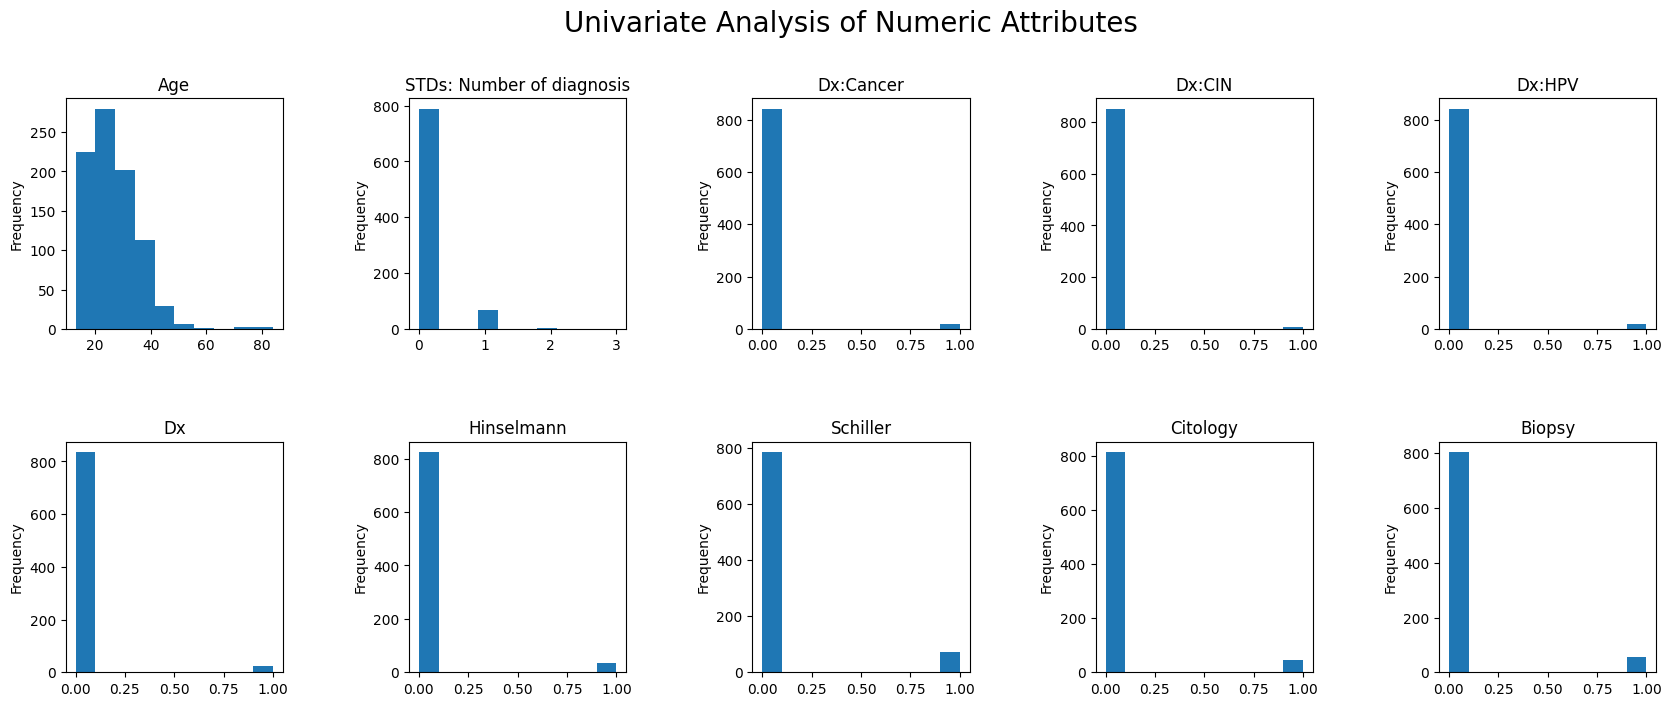

In [9]:
fig, a = plt.subplots(5, 5, figsize=(18, 18))
fig.tight_layout(pad=6.0)
fig.align_titles()
fig.suptitle('Univariate Analysis of Numeric Attributes',y=1.0,va='top',fontsize=20)

axes = a.flatten()
# gs = axes[0].get_gridspec()


# sbplt_barh = 0
# full_width_row = 11
for index, col in enumerate(df.select_dtypes(include='int64').columns):
  ax=axes[index]
  df[col].plot(kind='hist', ax=ax)
  ax.set_title(col) # Set title for clarity

num_of_attributes = (df.dtypes == 'int64').sum()
for ax in axes[num_of_attributes:]:
  fig.delaxes(ax)
plt.show()

**2.3: Bivariate Analysis with the target variable:**

As seen in the univarte analysis, all the categorical attributes are having numbers as strings. Hence, we can convert all those attributes into numbers and perform a single correlation analysis using heatmap.

To perform correlation analysis using a heatmap, we need to convert all relevant columns to a numeric data type. The object type columns that contain '?' as a value need to be handled. I will replace '?' with NaN (Not a Number) and then convert these columns to a numeric type. NaN values are standard representations for missing data in pandas and can be handled appropriately in subsequent steps.

In [10]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].replace('?', np.nan)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    int64  
 1   Number of sexual partners           832 non-null    float64
 2   First sexual intercourse            851 non-null    float64
 3   Num of pregnancies                  802 non-null    float64
 4   Smokes                              845 non-null    float64
 5   Smokes (years)                      845 non-null    float64
 6   Smokes (packs/year)                 845 non-null    float64
 7   Hormonal Contraceptives             750 non-null    float64
 8   Hormonal Contraceptives (years)     750 non-null    float64
 9   IUD                                 741 non-null    float64
 10  IUD (years)                         741 non-null    float64
 11  STDs                                753 non-n

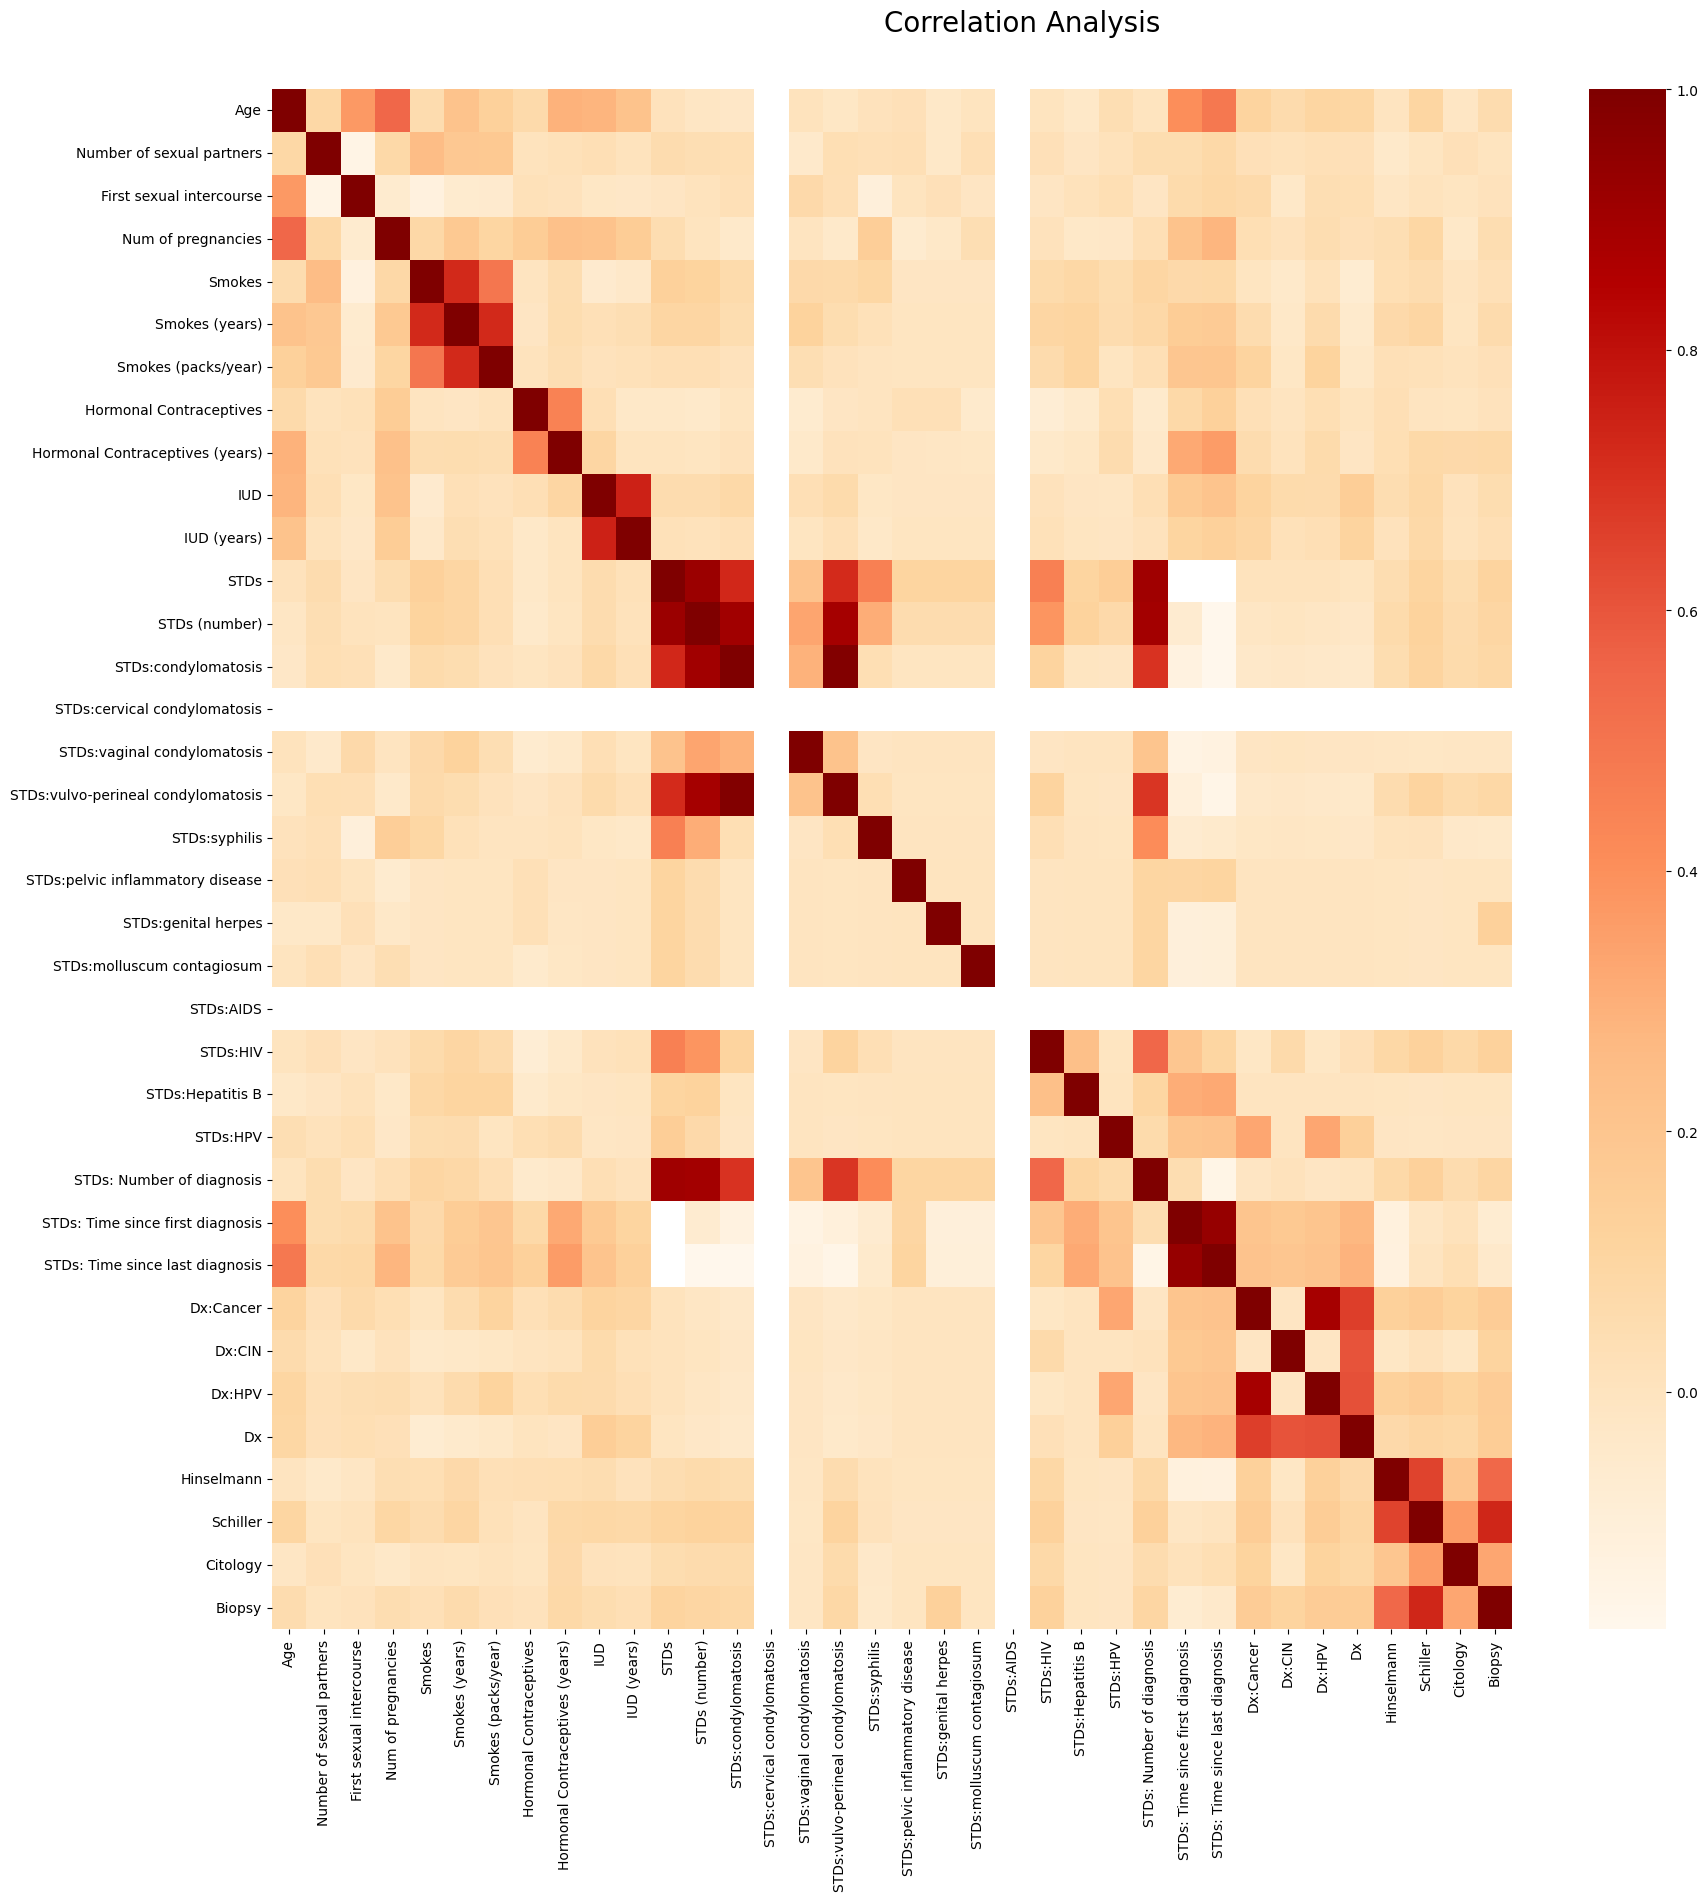

In [12]:
#plt.figure(figsize=(20, 15))
corr_matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
f.suptitle('Correlation Analysis',y=0.92,va='top',fontsize=20)
sns.heatmap(corr_matrix, annot=False, cmap='OrRd', ax=ax)
plt.show()